# Import libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:
##loading a pickled file
nyc_taxi_with_weather = pd.read_pickle("nyc_taxi_with_weather.pkl")


In [23]:
#Viewing the data of top 5 rows to take a glimpse of the data

nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,Queens,8.3,97.0,0.0,1.0,29.0
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0
3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0


In [24]:
#Creating deep copy of a new dataframe for training the model
data_for_model = nyc_taxi_with_weather.copy()

# 1. Model Training

In [25]:
#Viewing the data of top 5 rows to take a glimpse of the data
data_for_model.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,Queens,8.3,97.0,0.0,1.0,29.0
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0
3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0


In [26]:
# Define categorical, numerical and target features
cat_features = ['PULocationID', 'transaction_month', 'transaction_day',
                'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']

num_features = ['temperature', 'humidity', 'wind speed', 'cloud cover', 'amount of precipitation']

# Combine categorical and numerical features for the input
model_input_features = cat_features + num_features


#target features
target_feature = 'total_amount'



**NOTE**: for training the model, we have not included the **'Trip_Distance'**.

'**Trip_distance**' can be closely tied to '**total_amount**'. If we include it, our model might just rely heavily on '**trip_distance**' to make predictions and ignore other important features. This means the model is not really learning the complex relationships between all the features and '**total_amount**', but overly relying on just one feature.

## Train-test split

In [27]:
from sklearn.model_selection import train_test_split

X = data_for_model[model_input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Decision Tree Model

In [33]:
from sklearn.tree import DecisionTreeRegressor 

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [29]:

model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 8.530315521820555
mean_squared_error 196.56186557735285
root_mean_squared_error 14.020052267283202
r2 0.3071071288580358


<Axes: xlabel='true', ylabel='pred'>

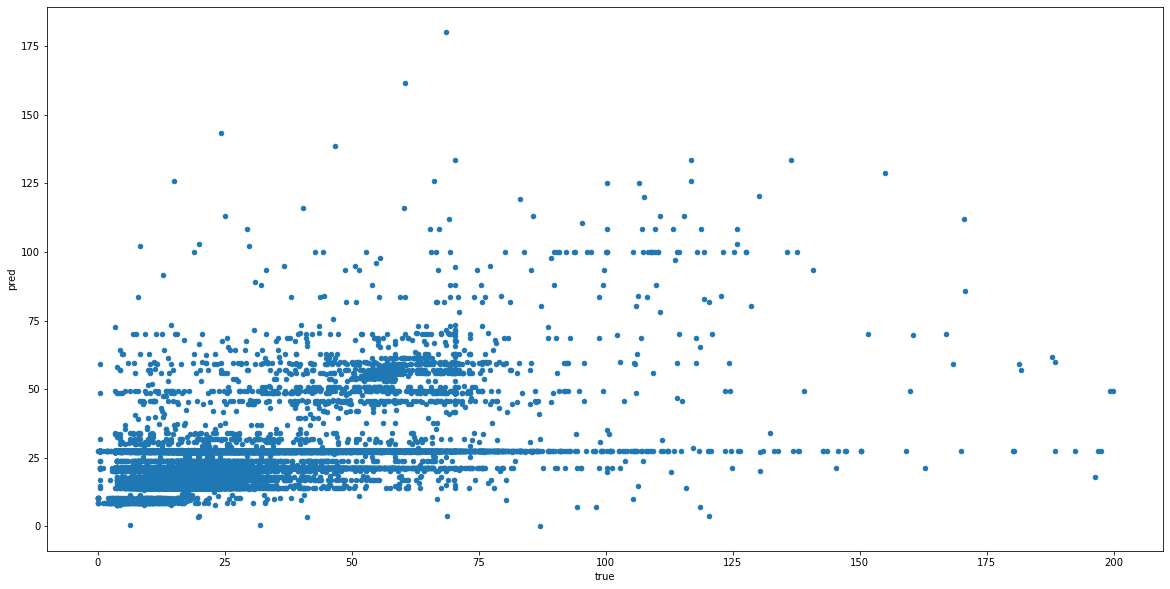

In [30]:
# create a scatter plot of the true and predicted values:

data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

In [31]:
 # Calculates and prints the correlation between the true values (y_test) and the predicted values (y_pred)

correlation = results['true'].corr(results['pred'])
print(f'Correlation between true and predicted values: {correlation}')


Correlation between true and predicted values: 0.5559657477880313


### Random Forest



In [34]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

RandomForestRegressor()

In [92]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 7.416947889559122
mean_squared_error 174.30205065384192
root_mean_squared_error 13.202350194334413
r2 0.38557436881903717


<Axes: xlabel='true', ylabel='pred'>

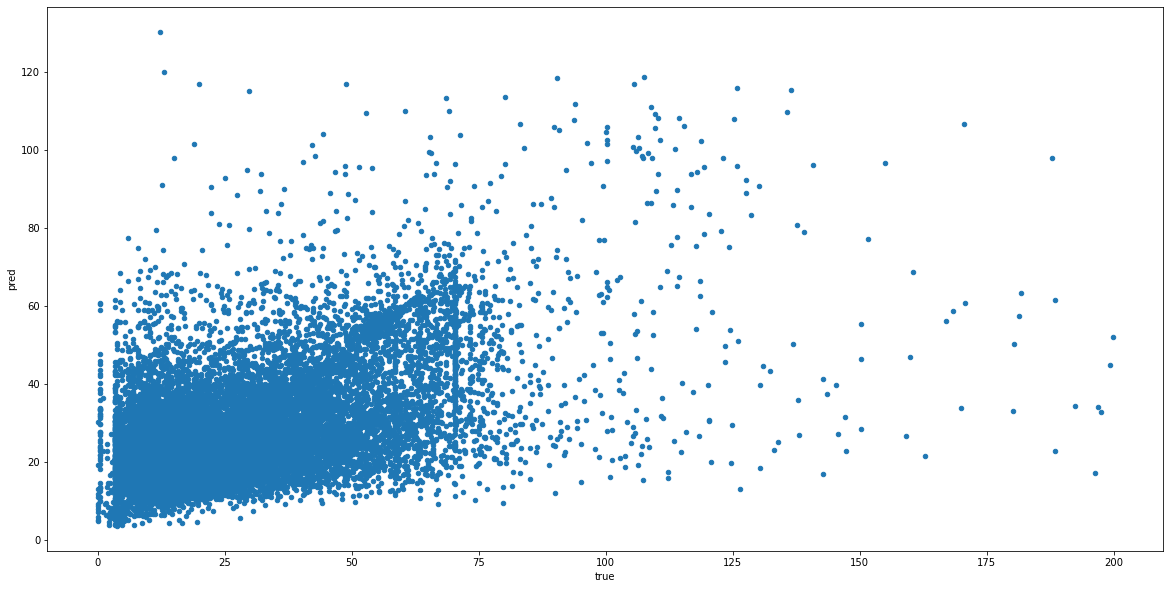

In [93]:
# create a scatter plot of the true and predicted values:

data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

In [94]:
 #Calculates and prints the correlation between the true values (y_test) and the predicted values (y_pred)


correlation = results['true'].corr(results['pred'])
print(f'Correlation between true and predicted values: {correlation}')


Correlation between true and predicted values: 0.6284617068725077


### Gradient boosting


In [35]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)

GradientBoostingRegressor()

In [96]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 8.390365101047033
mean_squared_error 179.07254306337038
root_mean_squared_error 13.381798947203263
r2 0.3687580846802485


<Axes: xlabel='true', ylabel='pred'>

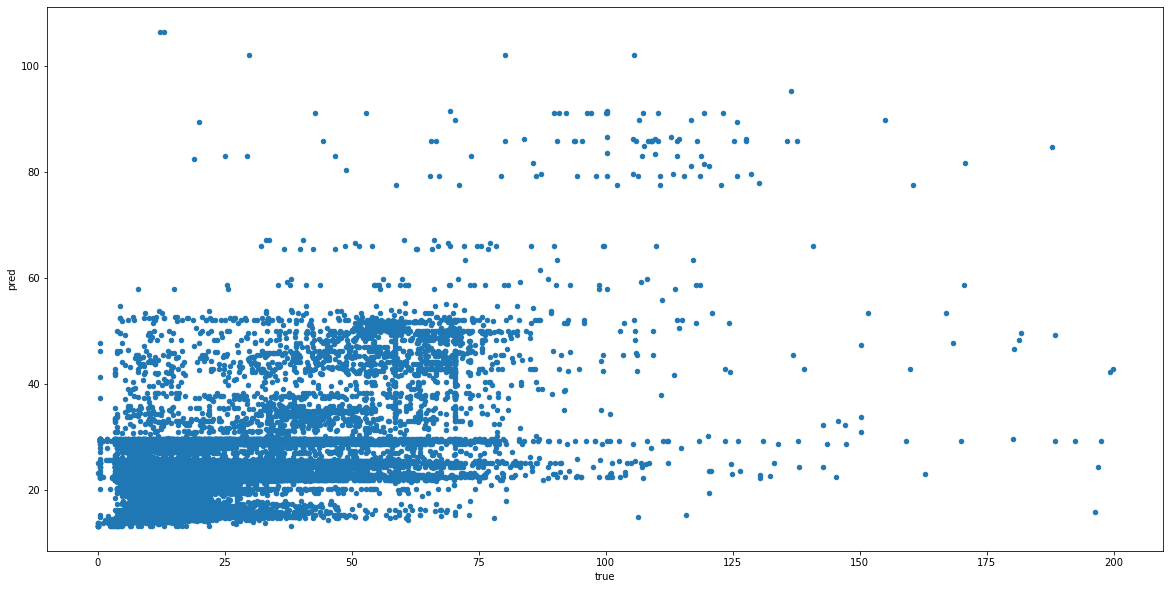

In [97]:
# create a scatter plot of the true and predicted values:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

In [98]:
 # Calculates and prints the correlation between the true values (y_test) and the predicted values (y_pred)
correlation = results['true'].corr(results['pred'])
print(f'Correlation between true and predicted values: {correlation}')


Correlation between true and predicted values: 0.6165998144704581


### K-Nearest Regression


In [99]:
from sklearn.neighbors import KNeighborsRegressor

# Create and fit the model
k = KNeighborsRegressor(n_neighbors=5)
k.fit(X_train, y_train)



KNeighborsRegressor()

In [100]:
model_at_hand = k

# Predict on the test set
y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 9.93102150486297
mean_squared_error 264.76688900356027
root_mean_squared_error 16.271659073479885
r2 0.06668015504356473


<Axes: xlabel='true', ylabel='pred'>

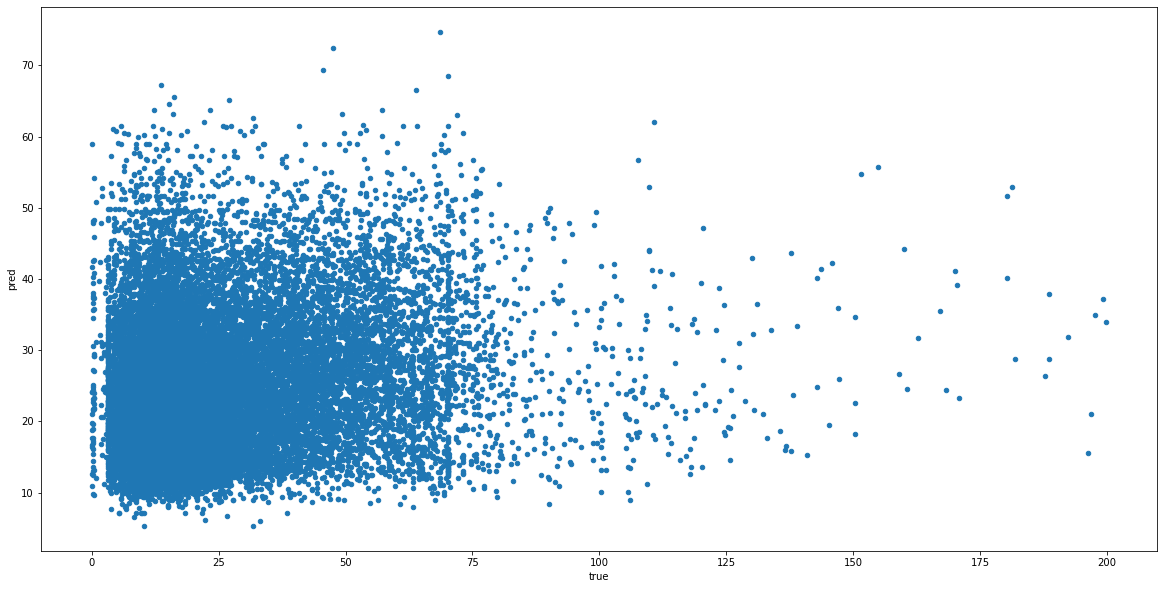

In [101]:
# create a scatter plot of the true and predicted values:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

In [102]:
 #Calculates and prints the correlation between the true values (y_test) and the predicted values (y_pred)
correlation = results['true'].corr(results['pred'])
print(f'Correlation between true and predicted values: {correlation}')


Correlation between true and predicted values: 0.3349865746052345


### Diplaying the results for each model

In [104]:
import pandas as pd

# Create a dictionary with the model names and their metrics
results = {
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'K Nearest Regression'],
    'MAE': [8.532978573452462, 7.416947889559122, 8.390365101047033, 9.93102150486297],
    'MSE': [197.3025842794365, 174.30205065384192, 179.07254306337038, 264.76688900356027],
    'RMSE': [14.046443830359216, 13.202350194334413, 13.381798947203263, 16.271659073479885],
    'R2': [0.3044960491010963, 0.38557436881903717, 0.3687580846802485, 0.06668015504356473],
    'Correlation': [0.5542215818983929, 0.6284617068725077, 0.6165998144704581, 0.3349865746052345]
}

# Convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame(results)

# Display the results table
display(results_df)


,Model,MAE,MSE,RMSE,R2,Correlation
0,Decision Tree,8.532979,197.302584,14.046444,0.304496,0.554222
1,Random Forest,7.416948,174.302051,13.202350,0.385574,0.628462
2,Gradient Boosting,8.390365,179.072543,13.381799,0.368758,0.616600
3,K Nearest Regression,9.931022,264.766889,16.271659,0.066680,0.334987


### Best results according to metrics

**Lower values for MAE, MSE, and RMSE, along with higher values for R2 and correlation, indicate better model performance.**

**The Random Forest model** with feature engineering performs the best among the four models according to the provided metrics. It has the lowest MAE, MSE, and RMSE, and the highest R2 and correlation. Therefore, in this scenario, the Random Forest model appears to be the most suitable choice.

We will use **Random Forest model** for tuning the performance in the next part below.



#  2. Tuning the model performance -Random Forest 

## Find the best parameter

In [31]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20] 
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [32]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


#**NOTE**: Before running the next line of code. Please read this below:

The piece of code is using the **RandomizedSearchCV method** to perform hyperparameter tuning on a Random Forest Regression model.


Be aware that the runtime for executing the code (Below) can vary considerably based on the capabilities of your machine. In my case, running this on a moderately powerful computer took approximately 3 to 4 hours.

If your dataset is large or if there are numerous hyperparameters to tune, it could take longer. 

This is because the process trains a new model for every unique combination of hyperparameters and for each fold in the cross-validation. Therefore, it's a computationally intensive task that may require substantial processing power and time."

In [33]:

#RandomizedSearchCV method

from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()


rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

#Transforms the results from the randomized search into a pandas DataFrame for easier reading and manipulation.
performances = pd.DataFrame.from_dict(rf_random.cv_results_)




Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [34]:
#Display the 'performances' results
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,131.424542,2.395547,5.775545,0.228351,200,10,1,sqrt,200,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.402156,0.418722,0.413293,0.411390,0.006895,2
1,40.000131,0.123128,1.182967,0.013165,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.353505,0.372505,0.362193,0.362734,0.007766,7
2,49.017750,1.474170,1.253954,0.165217,200,40,4,sqrt,20,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.358085,0.370075,0.363157,0.363772,0.004914,6
3,1230.554890,19.981025,5.352624,0.859450,400,40,10,auto,20,False,"{'n_estimators': 400, 'min_samples_split': 40,...",0.349765,0.368778,0.362745,0.360429,0.007933,8
4,4114.063085,143.190051,12.992206,0.124527,1000,20,20,auto,50,False,"{'n_estimators': 1000, 'min_samples_split': 20...",0.355001,0.370740,0.377615,0.367785,0.009466,5
5,1152.022285,19.127353,86.237496,17.323363,1200,5,1,sqrt,100,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.384219,0.397180,0.393233,0.391544,0.005424,4
6,230.141229,13.009303,5.245482,0.363701,1400,5,20,sqrt,10,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.270706,0.280072,0.273419,0.274732,0.003935,9
7,609.891868,11.084860,21.816496,1.968287,1400,10,10,sqrt,None,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.402024,0.419643,0.409135,0.410267,0.007237,3
8,5111.287265,224.579666,32.978540,9.066610,1800,10,2,auto,50,False,"{'n_estimators': 1800, 'min_samples_split': 10...",0.208536,0.219621,0.196956,0.208371,0.009254,10
9,431.703503,8.272534,15.147630,2.525456,600,10,2,sqrt,500,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.412201,0.429621,0.424056,0.421959,0.007264,1


This dataframe '**performances**' is generated by the **RandomizedSearchCV** object after fitting the model. It contains statistics for each run of the cross-validated randomized search on the hyperparameters. Here's a breakdown of the column definitions:

1. `mean_fit_time`: The average time it took to fit the model for each combination of hyperparameters.
2. `std_fit_time`: The standard deviation of the time it took to fit the model, indicating variability in the fitting time.
3. `mean_score_time`: The average time it took to score the model.
4. `std_score_time`: The standard deviation of the scoring time, indicating variability in the scoring time.
5. `param_n_estimators`, `param_min_samples_split`, `param_min_samples_leaf`, `param_max_features`, `param_max_depth`, `param_bootstrap`: These columns indicate the values of the hyperparameters that were used in that particular run.
6. `params`: This is a dictionary that includes all the hyperparameters used for that run.
7. `split0_test_score`, `split1_test_score`, `split2_test_score`: The model's performance on each of the 3 folds of the cross-validation.
8. `mean_test_score`: The average of the model's performance over the 3 folds of cross-validation.
9. `std_test_score`: The standard deviation of the model's performance over the 3 folds, indicating variability in the performance.
10. `rank_test_score`: The rank of the test score of that particular model among all the models tested.

The last row of the dataframe, with **index 9**, indicates the combination of hyperparameters that resulted in the highest mean_test_score, making it the best model found by the search.

**Save this result in csv file so that you can use them again**

In [35]:
#Save this result in csv file so that you can use them again

performances.to_csv("performances.csv") 


### FIrst Result

In [107]:
import time
from sklearn.ensemble import RandomForestRegressor

# Start the timer
t0= time.time()

# Initialize and train the RandomForestRegressor with optimal hyperparameters
best = RandomForestRegressor(
    n_estimators=600, 
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=500,
    bootstrap=False)

best.fit(X_train, y_train)

# End the timer and print the elapsed time
t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")

# Now the variable `best` holds your model trained with the optimal hyperparameters.
model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))


Time elapsed:  274.42989230155945  seconds
mean_absolute_error 7.305586899868772
mean_squared_error 161.75051873447126
root_mean_squared_error 12.718117735516968
r2 0.4298193039355095


<Axes: xlabel='true', ylabel='pred'>

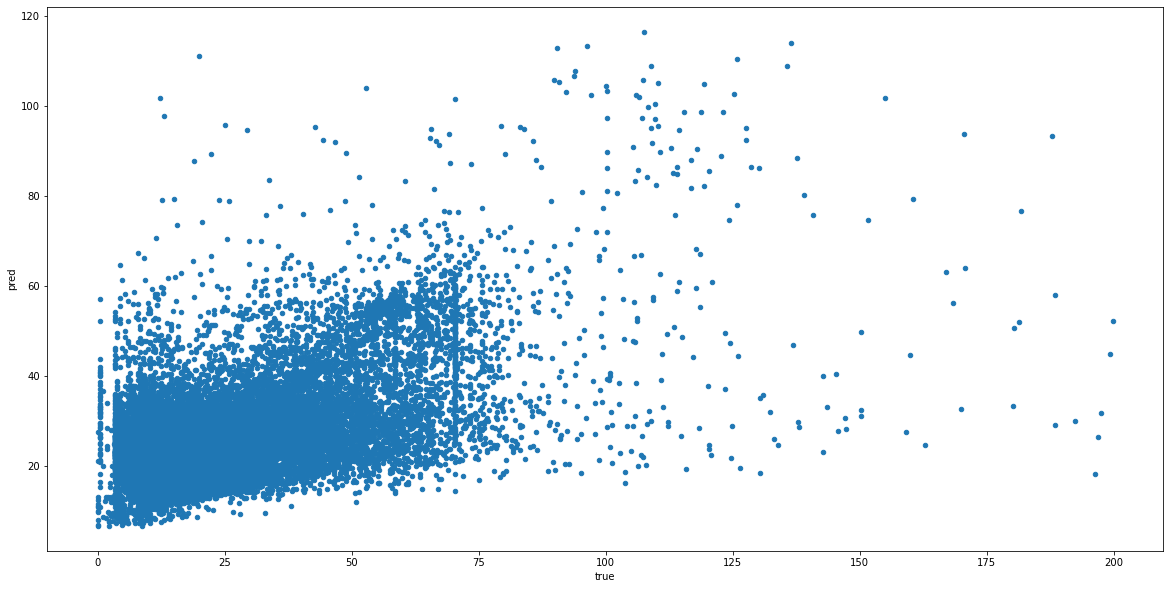

In [108]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

In [109]:
correlation = results['true'].corr(results['pred'])
print(f'Correlation between true and predicted values: {correlation}')


Correlation between true and predicted values: 0.655715673633973


### Second  Result

In [11]:

import time
from sklearn.ensemble import RandomForestRegressor

# Start the timer
t0= time.time()

# Initialize and train the RandomForestRegressor with optimal hyperparameters
best = RandomForestRegressor(
    n_estimators=1800, 
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=300,
    bootstrap=True)

best.fit(X_train, y_train)

# End the timer and print the elapsed time
t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")

# Now the variable `best` holds your model trained with the optimal hyperparameters.
model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))


Time elapsed:  551.9594843387604  seconds
mean_absolute_error 7.399071916640254
mean_squared_error 160.65498045056765
root_mean_squared_error 12.674974573961387
r2 0.4336811449123962


<Axes: xlabel='true', ylabel='pred'>

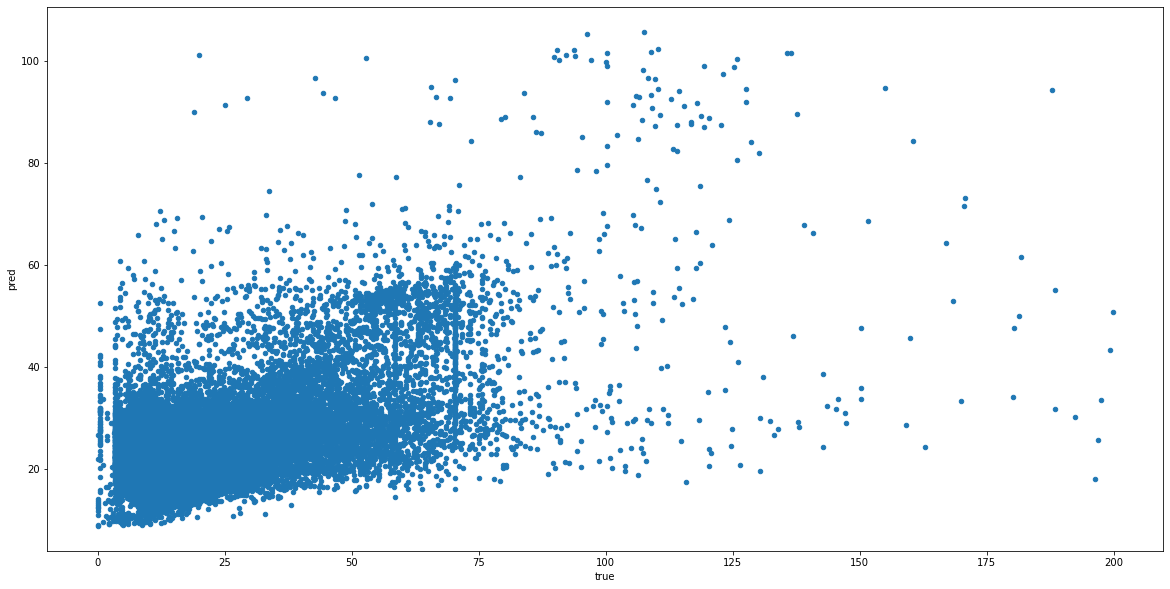

In [12]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

In [13]:
correlation = results['true'].corr(results['pred'])
print(f'Correlation between true and predicted values: {correlation}')


Correlation between true and predicted values: 0.6613268768570326


### Thrid Result

In [14]:
#3rd result

import time
from sklearn.ensemble import RandomForestRegressor

# Start the timer
t0= time.time()

# Initialize and train the RandomForestRegressor with optimal hyperparameters
best = RandomForestRegressor(
    n_estimators=200, 
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=150,
    bootstrap=True)

best.fit(X_train, y_train)

# End the timer and print the elapsed time
t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")

# Now the variable `best` holds your model trained with the optimal hyperparameters.
model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))


Time elapsed:  65.61324763298035  seconds
mean_absolute_error 7.333354337883199
mean_squared_error 160.11800743967038
root_mean_squared_error 12.653774434518358
r2 0.4355740083635722


<Axes: xlabel='true', ylabel='pred'>

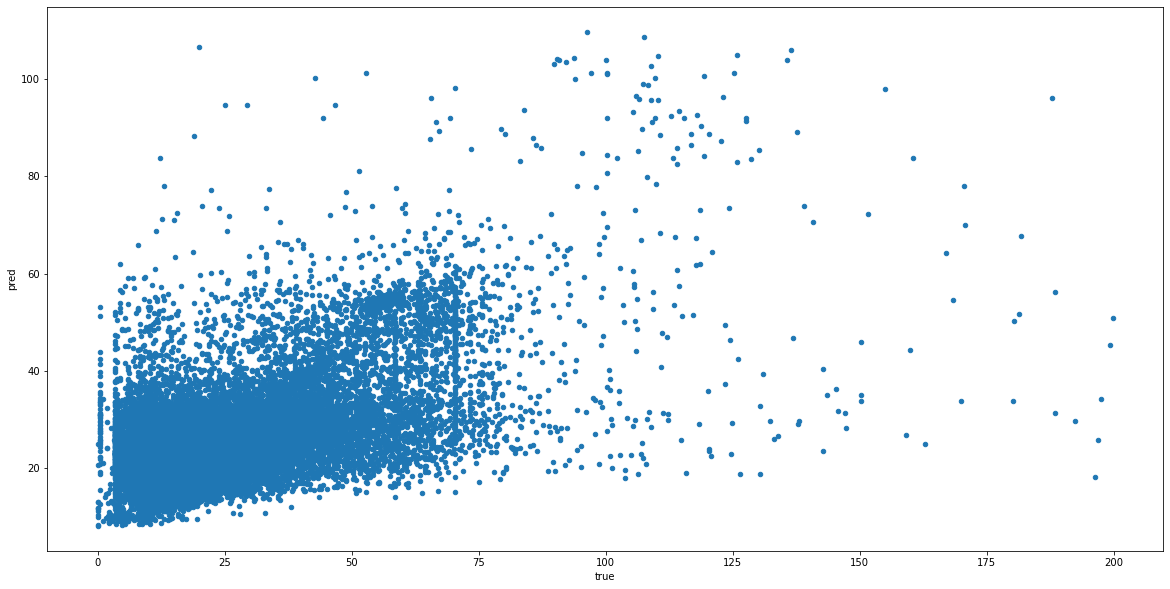

In [15]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

In [16]:
correlation = results['true'].corr(results['pred'])
print(f'Correlation between true and predicted values: {correlation}')


Correlation between true and predicted values: 0.6613065268367443


In [ ]:
#Displaying the Results

In [18]:
# Create a dictionary with the model names and their metrics
results = {
    'Model': ['RF Hyperparameter Tuning 1', 'RF Hyperparameter Tuning 2', 'RF Hyperparameter Tuning 3'],
    'MAE': [7.305586899868772, 7.399071916640254, 7.333354337883199],
    'MSE': [161.75051873447126, 160.65498045056765, 160.11800743967038],
    'RMSE': [12.718117735516968, 12.674974573961387, 12.653774434518358],
    'R2': [0.4298193039355095, 0.433681144912396, 0.4355740083635722],
    'Correlation': [0.655715673633973, 0.6613268768570326, 0.6613065268367443]
}

# Convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame(results)

# Display the results table
display(results_df)

,Model,MAE,MSE,RMSE,R2,Correlation
0,RF Hyperparameter Tuning 1,7.305587,161.750519,12.718118,0.429819,0.655716
1,RF Hyperparameter Tuning 2,7.399072,160.654980,12.674975,0.433681,0.661327
2,RF Hyperparameter Tuning 3,7.333354,160.118007,12.653774,0.435574,0.661307


## Best results according to metrics

The summary of the Random Forest model results, including both the original model and the three models with hyperparameter tuning, is as follows:

|   | Model                      | MAE      | MSE        | RMSE         | R2           | Correlation |
|---|----------------------------|----------|------------|--------------|--------------|-------------|
| 0 | Original Random Forest     | 7.416948 | 174.302051 | 13.202350    | 0.385574     | 0.628462    |
| 1 | RF Hyperparameter Tuning 1 | 7.305587 | 161.750518 | 12.718118    | 0.429819     | 0.655716    |
| 2 | RF Hyperparameter Tuning 2 | 7.399072 | 160.654980 | 12.674975    | 0.433681     | 0.661327    |
| 3 | RF Hyperparameter Tuning 3 | 7.333354 | 160.118007 | 12.653774    | 0.435574     | 0.661307    |

Looking at the table above, we can see that **all three tuned models have shown better performance than the original Random Forest model across all our chosen metrics**. These models give us smaller prediction errors, which is evident from their lower MAE, MSE, and RMSE scores. They also provide better predictions that are more in line with the actual data. This is shown by their **higher R2 scores, indicating that they capture more of the variation in our dataset**, as well as their higher correlation between the actual and predicted values.

Of these three refined models, the **third one titled 'RF Hyperparameter Tuning 3' is leading the pack**. It's making the smallest errors, as seen from its lowest MAE and RMSE scores, and it's explaining the most variation in the data, with the highest R2 score. Its correlation score is also nearly as good as the second model's score, which is the highest among all models. However, it's important to note that the differences between these three tuned models are relatively minor.

From this, we can conclude that **fine-tuning the hyperparameters effectively improved the performance of the Random Forest model** for this specific case. This will allow us to make more accurate predictions when using new data. Nevertheless, these models could still be improved upon, since the **R2 scores are less than 0.5**. This means that less than half of the variability in the dependent variable can be explained by our models. To address this, we could explore **adding more relevant features, trying different types of models, or continuing to refine the hyperparameters in future analyses**.

## 3. Overall results according to metrics



| Model                           | MAE       | MSE           | RMSE          | R2        | Correlation |
|---------------------------------|-----------|---------------|---------------|-----------|-------------|
| Decision Tree (Benchmark Model) | 9.7780135 | 217.234861097 | 14.7388894119 | 0.2247845 | 0.47476049  |
| Decision Tree                   | 8.5329785 | 197.302584279 | 14.0464438303 | 0.3044960 | 0.554221581 |
| Random Forest                   | 7.4169478 | 174.302050653 | 13.2023501943 | 0.3855743 | 0.628461706 |
| Gradient Boosting               | 8.3903651 | 179.072543063 | 13.3817989472 | 0.3687580 | 0.616599814 |
| K-Nearest Regression            | 9.9310215 | 264.766889003 | 16.2716590734 | 0.0666801 | 0.334986574 |
| Tuned Random Forest             | 7.333354  | 160.118007    | 12.653774     | 0.435574  | 0.661307    |

The  **benchmark model (Decision Tree without involving feature engineering)**  performs slightly worse than some of the other models in terms of all metrics. This indicates that these models are learning useful information from the other features as well. 

The **tuned Random Forest model is now the best performing model across all evaluation metrics including High R2 and High Correlation**. 

Examing feature selection and hyperparameter tuning clearly have led to a successful result.